[-3.7703250015808925, -0.9729468760347317, -0.8538350929261997, -0.8101816487157325, -0.7892042044526507, -0.7781356861606914, -0.7720198811351389, -0.7685477407265007, -0.7665424453931017, -0.765371171677885, -0.7646817483104589, -0.7642737296646813, -0.7640312937345681, -0.7638868168143527, -0.763800524001184, -0.763748894311487, -0.7637179625727264, -0.7636994118556051, -0.7636882773792896, -0.7636815900157379]
[-7.100926187782794, -1.502889880173885, -1.1983067056725087, -1.0697281924654485, -0.9974597331178949, -0.9508466594303088, -0.9181707328319894, -0.8939534967401168, -0.8752918861141329, -0.8605046184271798, -0.8485474927728633, -0.8387330468540628, -0.8305858737372154, -0.8237635173468645, -0.8180109809024327, -0.8131332986495322, -0.8089782398748543, -0.8054249376157326, -0.8023761264376191, -0.7997526674991896]
[-10.43334329892582, -2.0583161706900994, -1.5879652840027763, -1.3799772911422024, -1.2578955741022135, -1.1764226791383399, -1.1177970425125452, -1.0734307901132

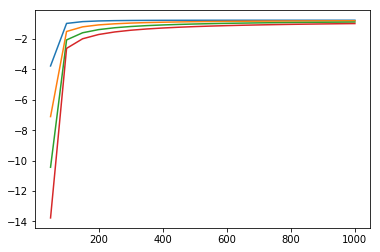

In [2]:
import numpy as np
from mpl_toolkits.mplot3d import axes3d
import matplotlib.pyplot as plt
%matplotlib inline

#設m為奇數
#n=401#將縱軸切為n等分
#m=1001#將橫軸切為m等分
for s in [(41,111),(81,221),(121,331),(161,441)]:
    n=s[0]
    m=s[1]
    array = np.zeros(s)
    abcd=[[1.5,2.5],[4.0,5.0],[6.0,7.0],[8.5,9.0]]
    abcd=[[x*(m-1)/11 for x in y] for y in abcd]

    #設定起始值
    for i in range(m):

        if(i>=abcd[1][0] and i<=abcd[1][1]):
            array[int((n-1)/2)][i]=0.5
           # print("array[",int((n-1)/2),"][",i,"]=",array[int((n-1)/2)][i])

        elif(i>=abcd[2][0] and i<=abcd[2][1]):

            array[int((n-1)/2)][i]=-0.5
           # print("array[",int((n-1)/2),"][",i,"]=",array[int((n-1)/2)][i])

    #print("during operation:")
    mylist=[]
    for total_iter in [1000]:
        totalcharge=0
        for iterate in range(total_iter):
            #橫
            for j in range(int((n-1)/2),0,-1):
                #縱
                for i in range(1,int((m+1)/2)):
                    if(j==((n-1)/2)):
                        if( (i>=abcd[1][0] and i<=abcd[1][1] ) or (i>=abcd[2][0] and i<=abcd[2][1]) or (i>=abcd[3][0] and i<=abcd[3][1]) or (i>=abcd[0][0] and i<=abcd[0][1])):
                            #print("array[",j,"][",i,"]=",array[j][i])
                            continue

                    array[j][i]=(array[j][i+1]+array[j][i-1]+array[j-1][i]+array[j+1][i])/4
                    array[j][m-i-1]=(-array[j][i])
                    array[n-j-1][i]=array[j][i]
                    array[n-j-1][m-i-1]=(-array[j][i])
                    #print("array[",j,"][",i,"]=",array[j][i])
           # print(array)
       
            if(iterate%50==0):
                totalcharge=0   
                for point in range(1,m-1):
                    if(point>=abcd[1][0] and point<=abcd[1][1]):
                        #4mm/(m等分)
                        #print("iterate=",iterate)
                        #print("array[",int((n-1)/2+1),"][",point,"]=",array[int((n-1)/2+1)][point])
                        #print("array[",int((n-1)/2),"][",point,"]=",array[int((n-1)/2)][point])
                        totalcharge=totalcharge+(array[int((n-1)/2+1)][point]-array[int((n-1)/2)][point])/(4/n)*(11/m)
                mylist.append(totalcharge*2)
       
       # print(totalcharge*2)
        #print(mylist)
        #print(array)
        plt.plot([50,100,150,200,250,300,350,400,450,500,550,600,650,700,750,800,850,900,950,1000],mylist) 
        
